> yes I can give you specific code but it’s just quickbin’s bin2d using the photonlist where the locations are ra, dec and the weights are roll. 

In [1]:
import pandas as pd
from quickbin import bin2d
from rich import print
import matplotlib.pyplot as plt
import numpy as np
from astropy.visualization import ZScaleInterval
import pyarrow.parquet as pq



In [2]:
q = (
    pq.read_table(
        'test_data/e23456/e23456-nd-b00.parquet',
        filters=[("detrad", "<=", 450)],
        columns=["ra", "dec", "col", 'row', 'roll'],  # only load these columns
    )
    .to_pandas()
    .dropna()
)

In [16]:
frame = bin2d(
                q['ra'].to_numpy(),
                q['dec'].to_numpy(),
                q['roll'].to_numpy(),
                'std',
                n_bins=800,
            )

([], [])

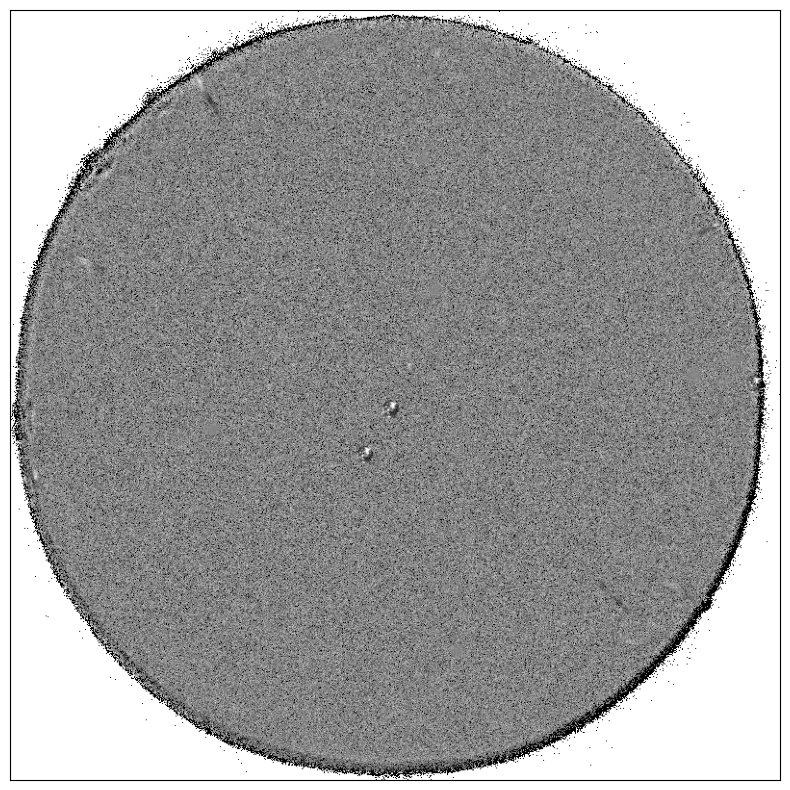

In [17]:
plt.figure(figsize=(10,10))
plt.imshow(ZScaleInterval()(frame), cmap='grey',origin='lower')
plt.xticks([])
plt.yticks([])